In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df[df['total_bedrooms'].isna()]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []

In [7]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
df.describe(include='O')

ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

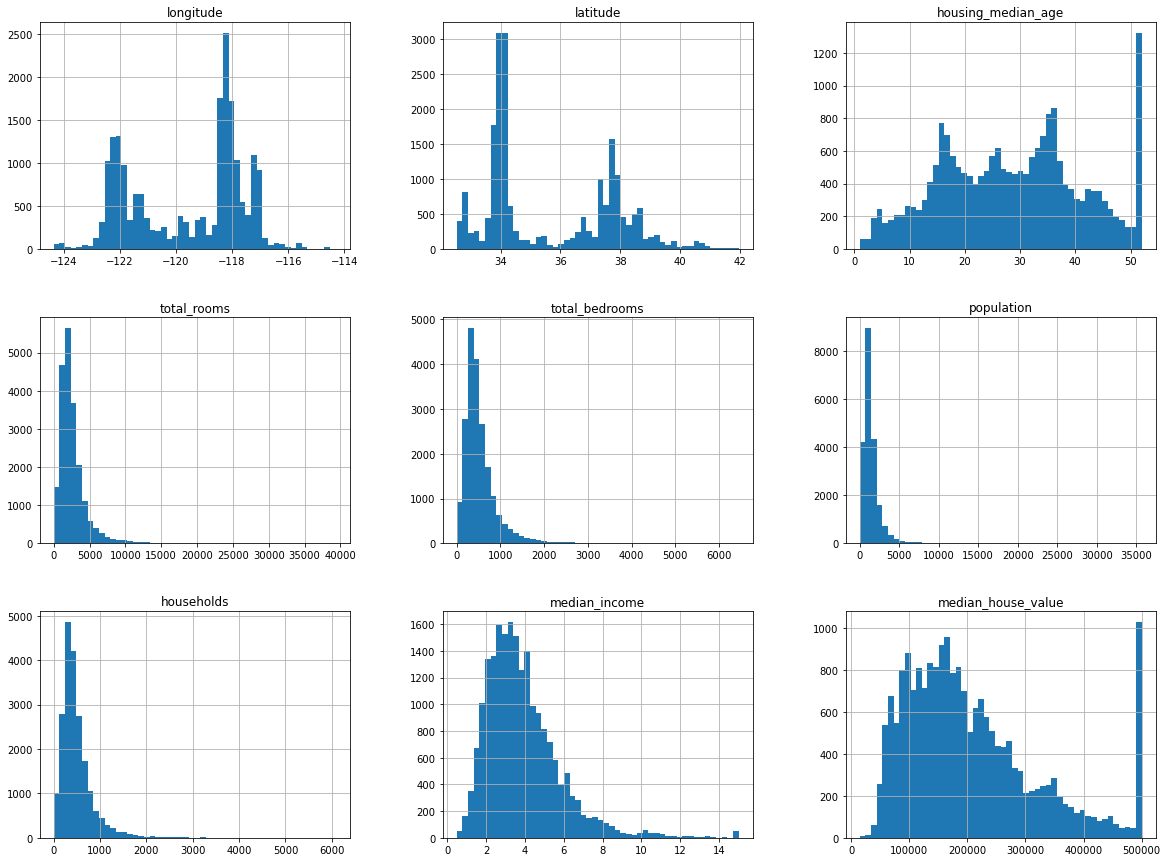

In [11]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [13]:
df.dropna(inplace=True)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['rooms_per_household'].nlargest(10)
df['rooms_per_household'].nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [15]:
df.loc[[1979, 5916, 8219], ['total_rooms', 'households', 'rooms_per_household']]

total_rooms  households  rooms_per_household
1979       1988.0        15.0           132.533333
5916         11.0        13.0             0.846154
8219         32.0        36.0             0.888889

In [17]:
df['pop_per_household'] = df['population'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563700   
50%        435.000000   1166.000000    409.000000       3.536500   
75%        647.000000   1722.000000    604.000000       4.744000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  rooms_per_household  pop_per_household  \
count        20433.000000         20433.000000       20433.000000   
mean        206864.413155             5.431344           3.071533   
std         115435.667099             2.482946          10.438269   
min          14999.000000             0.846154           0.692308   
25%         119500.000000             4.441441           2.429032   
50%         179700.000000             5.230769           2.817582   
75%         264700.000000             6.052381           3.281513   
max         500001.000000           141.909091        1243.333333   

       bedrooms_per_room  
count       20433.000000  
mean            0.213039  
std             0.057983  
min             0.100000  
25%             0.175427  
50%             0.203162  
75%             0.239821  
max             1.000000

<AxesSubplot:>

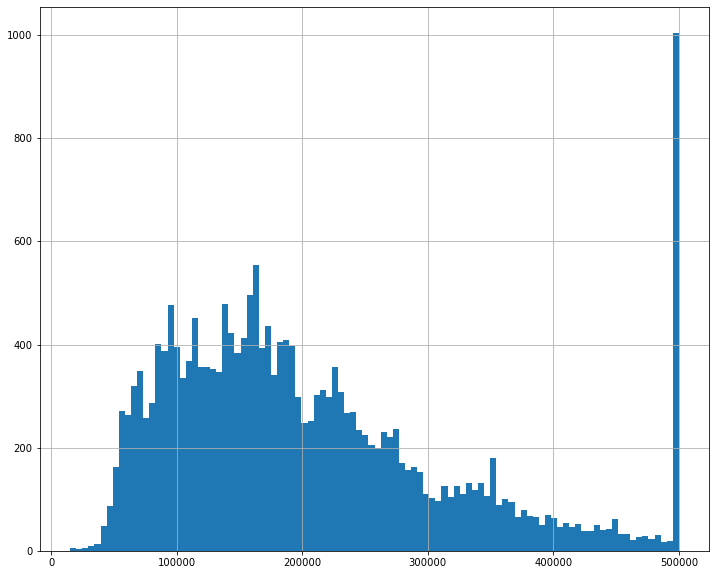

In [19]:
df['median_house_value'].hist(bins=100, figsize=(12,10))

In [21]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot:>

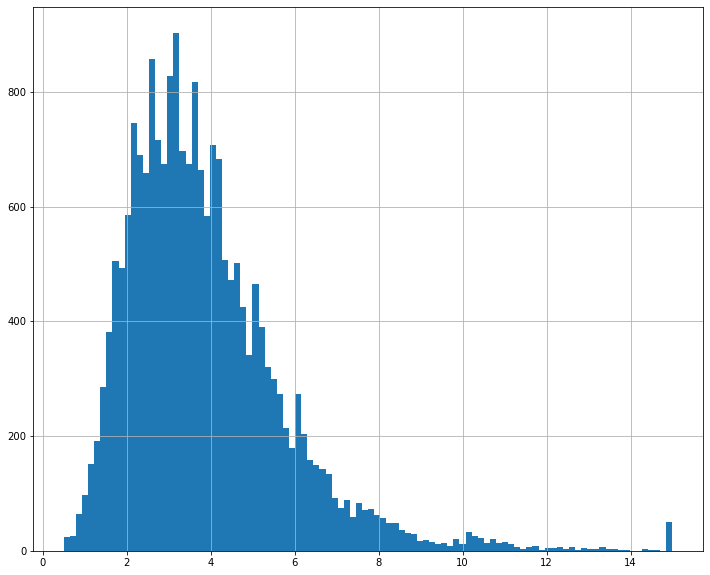

In [22]:
df['median_income'].hist(bins=100, figsize=(12,10))

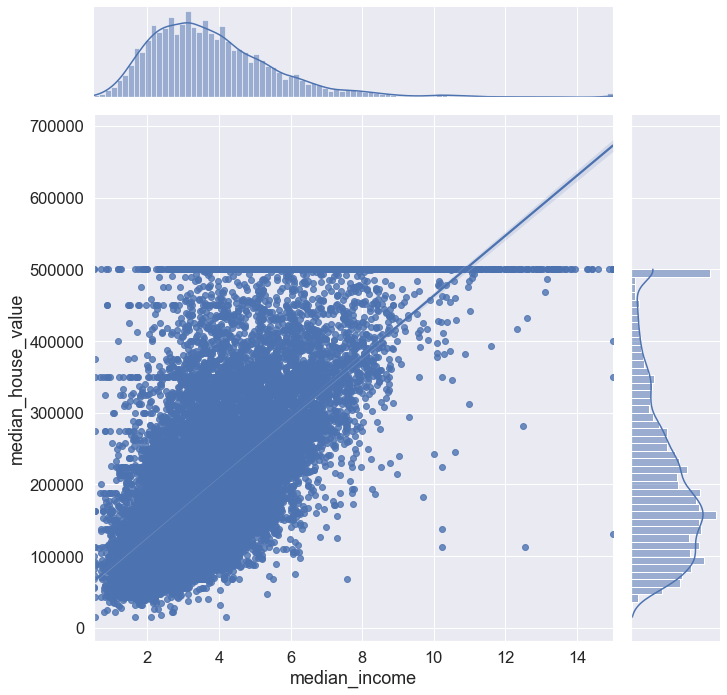

In [24]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x='median_income', y='median_house_value', kind='reg', height=10)
plt.show()

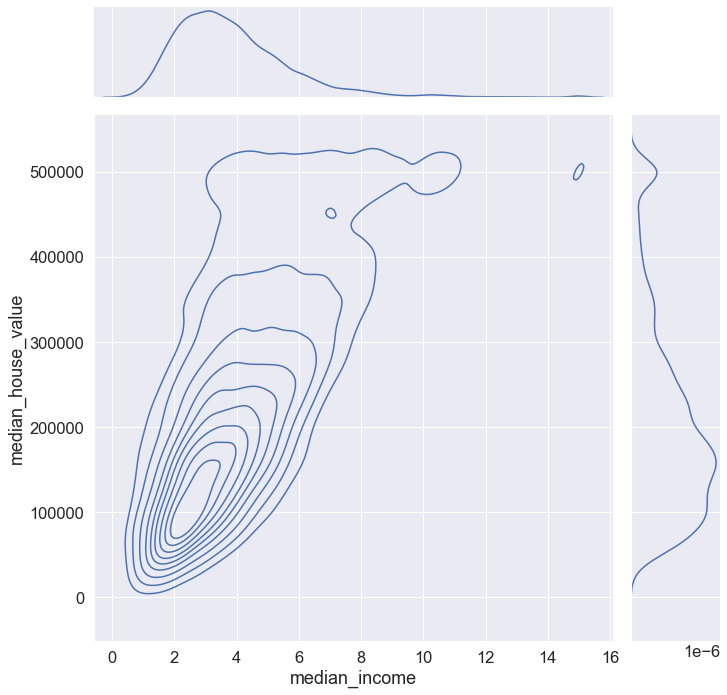

In [25]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x='median_income', y='median_house_value', kind='kde', height=10)
plt.show()

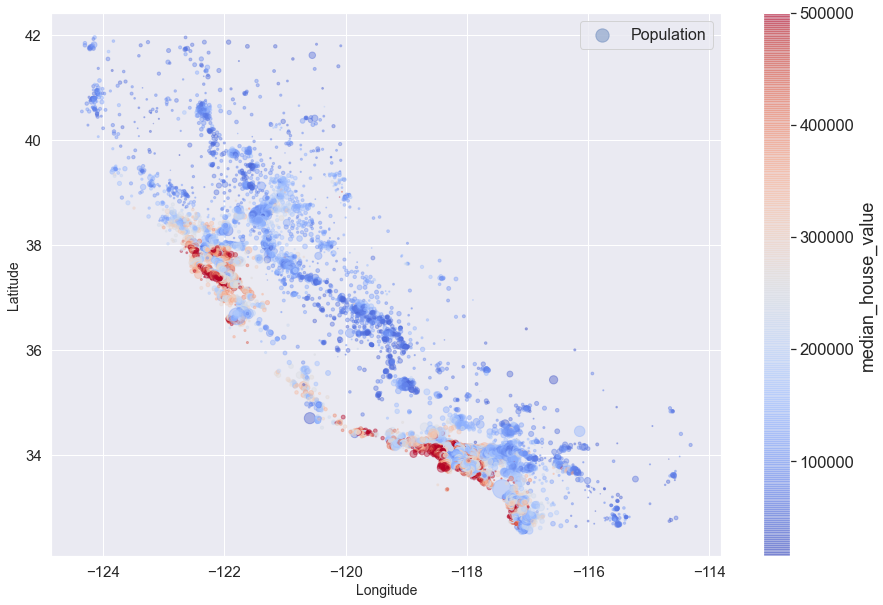

In [26]:
df.plot(kind='scatter', x='longitude', y='latitude', s=df['population']/100, label='Population', figsize=(15, 10), c='median_house_value', cmap='coolwarm', colorbar=True, alpha=0.4, fontsize=15, sharex=False)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.legend(fontsize=16)
plt.show()

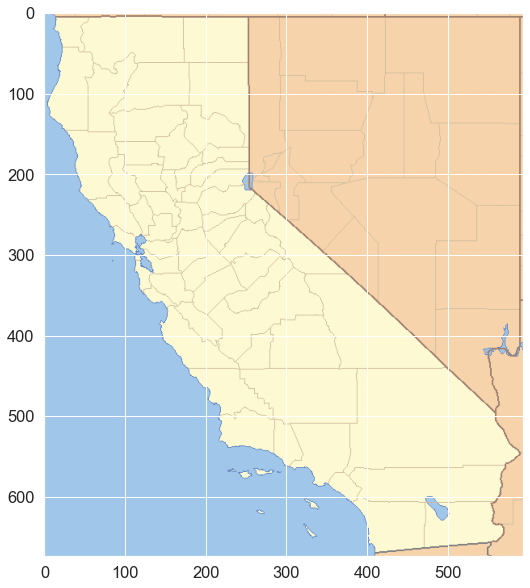

In [29]:
cali_img = mpimg.imread('california.png')
plt.figure(figsize=(15, 10))
plt.imshow(cali_img)
plt.show()

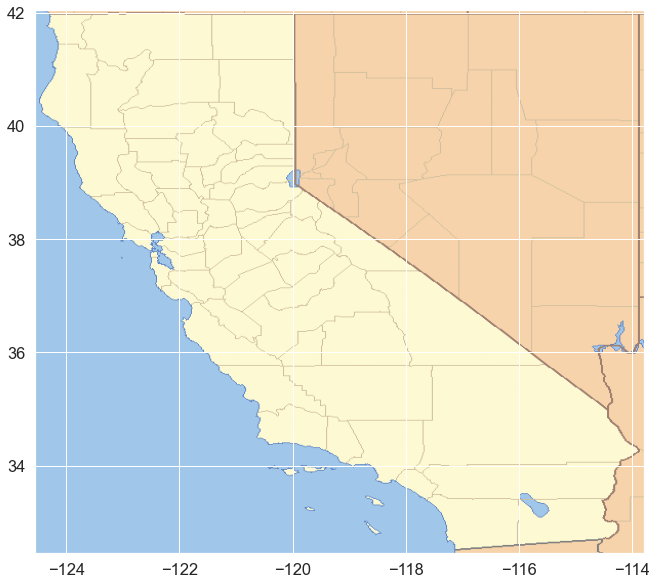

In [30]:
plt.figure(figsize=(15, 10))
plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

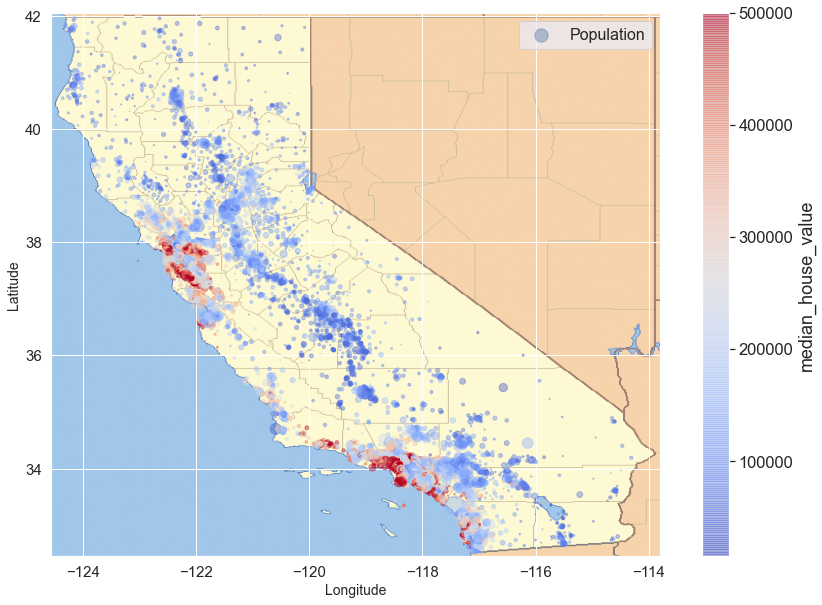

In [31]:
df.plot(kind='scatter', x='longitude', y='latitude', s=df['population']/100, label='Population', figsize=(15, 10), c='median_house_value', cmap='coolwarm', colorbar=True, alpha=0.4, fontsize=15, sharex=False)
plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [32]:
prox = df['ocean_proximity'].unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

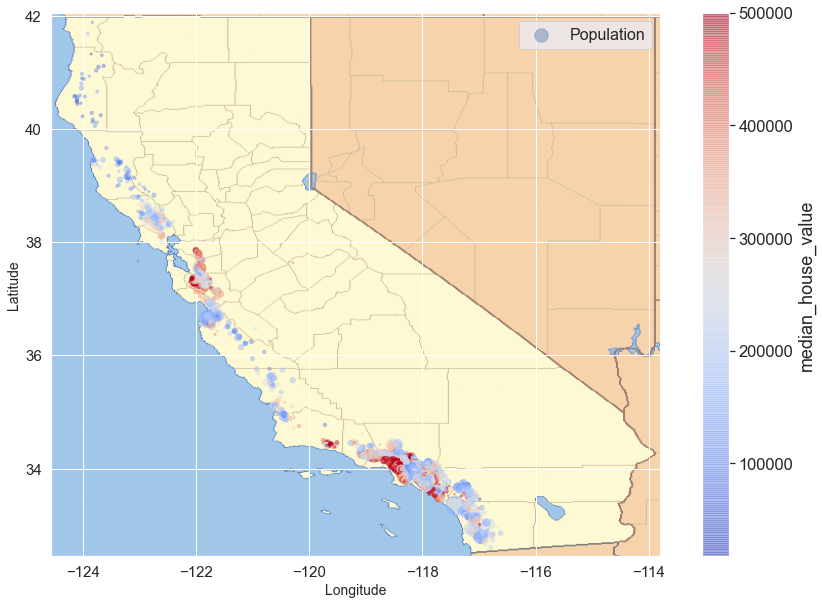

In [34]:
df_loc = df[df['ocean_proximity'] == prox[1]].copy()
df_loc.plot(kind='scatter', x='longitude', y='latitude', s=df_loc['population']/100, label='Population', figsize=(15, 10), c='median_house_value', cmap='coolwarm', colorbar=True, alpha=0.4, fontsize=15, sharex=False)
plt.imshow(cali_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [36]:
df['income_cat'] = pd.qcut(df['median_income'], q=[0, 0.25, 0.5, 0.75, 0.95, 1],
                          labels=['Low', 'Below_Average', 'Above_Average', 'High', 'Very_High'])
df['income_cat'].value_counts(normalize=True)

Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very_High        0.050017
Name: income_cat, dtype: float64

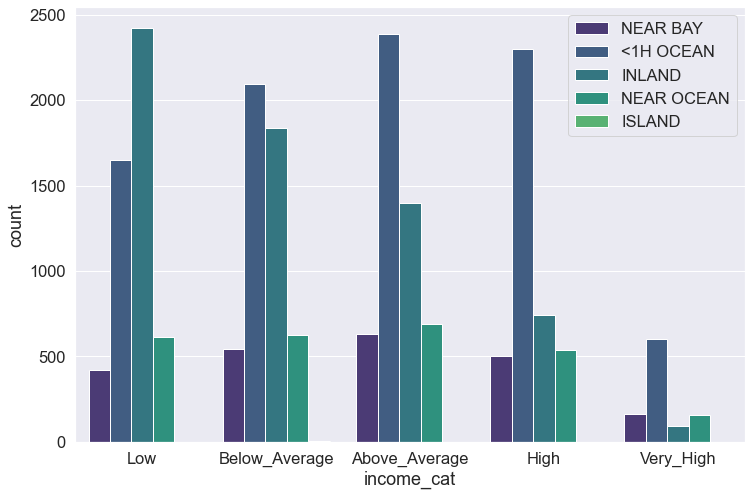

In [40]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5, palette='viridis')
sns.countplot(data=df, x='income_cat', hue='ocean_proximity')
plt.legend(loc=1)
plt.show()

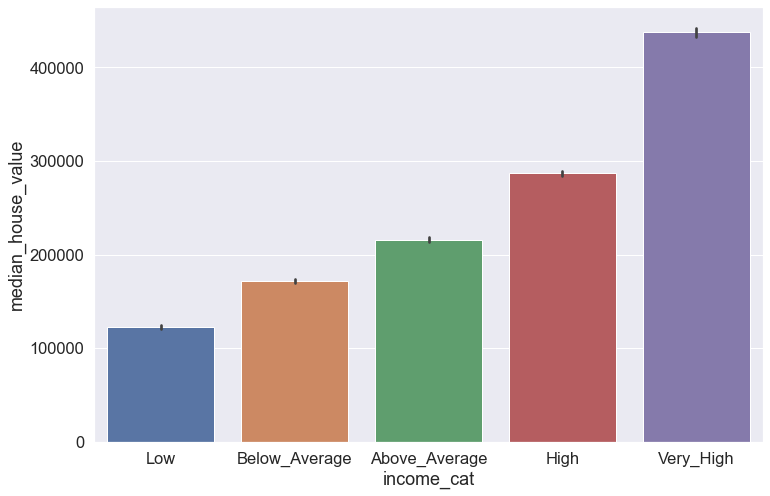

In [41]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.barplot(data=df, x='income_cat', y='median_house_value', dodge=True)
plt.show()

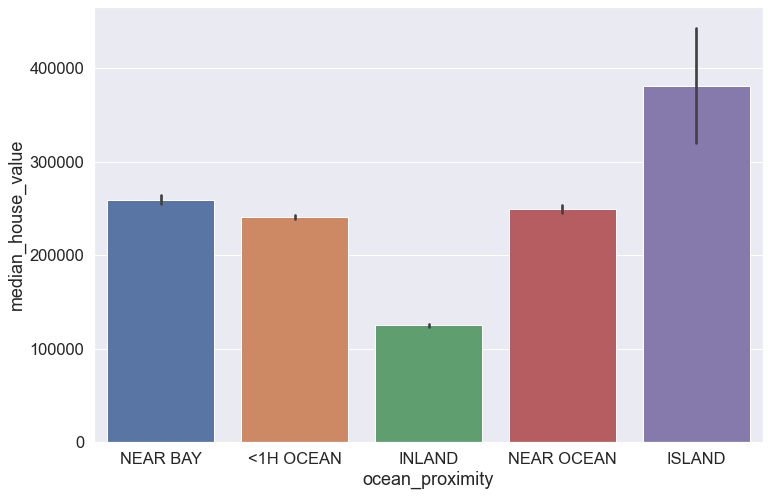

In [42]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
sns.barplot(data=df, x='ocean_proximity', y='median_house_value', dodge=True)
plt.show()

In [46]:
matrix = df.groupby(['income_cat', 'ocean_proximity'])['median_house_value'].mean().unstack().drop(columns=['ISLAND'])
matrix = matrix.astype('int')

ocean_proximity  <1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
income_cat                                              
Low                 161337   84820    155122      148027
Below_Average       197236  115124    220196      208665
Above_Average       232278  147846    261965      255293
High                292208  208095    322566      337446
Very_High           439784  347571    451015      468739

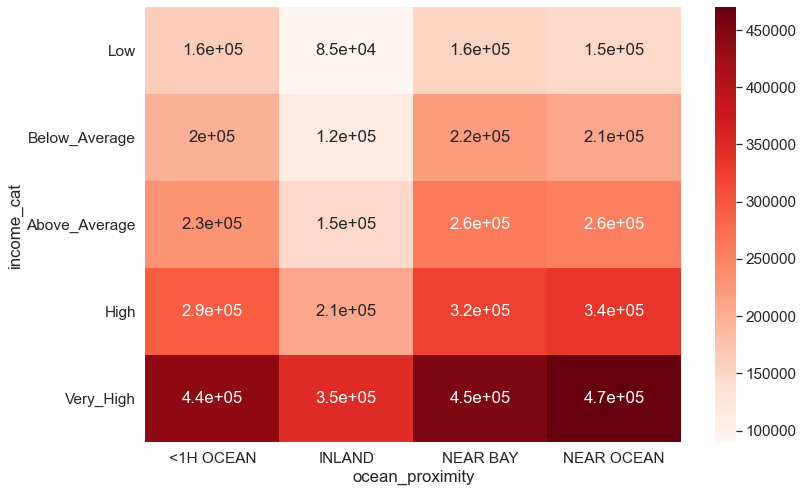

In [49]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.4)
sns.heatmap(data=matrix, cmap='Reds', annot=True, vmin=90000, vmax=470000)
plt.show()

In [50]:
label = df['median_house_value'].copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [51]:
features = df.drop(columns = ['median_house_value'])
features

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_proximity  \
0           322.0       126.0         8.3252        NEAR BAY   
1          2401.0      1138.0         8.3014        NEAR BAY   
2           496.0       177.0         7.2574        NEAR BAY   
3           558.0       219.0         5.6431        NEAR BAY   
4           565.0       259.0         3.8462        NEAR BAY   
...           ...         ...            ...             ...   
20635       845.0       330.0         1.5603          INLAND   
20636       356.0       114.0         2.5568          INLAND   
20637      1007.0       433.0         1.7000          INLAND   
20638       741.0       349.0         1.8672          INLAND   
20639      1387.0       530.0         2.3886          INLAND   

       rooms_per_household  pop_per_household  bedrooms_per_room  \
0                 6.984127           2.555556           0.146591   
1                 6.238137           2.109842           0.155797   
2                 8.288136           2.802260           0.129516   
3                 5.817352           2.547945           0.184458   
4                 6.281853           2.181467           0.172096   
...                    ...                ...                ...   
20635             5.045455           2.560606           0.224625   
20636             6.114035           3.122807           0.215208   
20637             5.205543           2.325635           0.215173   
20638             5.329513           2.123209           0.219892   
20639             5.254717           2.616981           0.221185   

          income_cat  
0          Very_High  
1          Very_High  
2               High  
3               High  
4      Above_Average  
...              ...  
20635            Low  
20636            Low  
20637            Low  
20638            Low  
20639            Low  

[20433 rows x 13 columns]

In [52]:
features.select_dtypes('float')

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  rooms_per_household  \
0           322.0       126.0         8.3252             6.984127   
1          2401.0      1138.0         8.3014             6.238137   
2           496.0       177.0         7.2574             8.288136   
3           558.0       219.0         5.6431             5.817352   
4           565.0       259.0         3.8462             6.281853   
...           ...         ...            ...                  ...   
20635       845.0       330.0         1.5603             5.045455   
20636       356.0       114.0         2.5568             6.114035   
20637      1007.0       433.0         1.7000             5.205543   
20638       741.0       349.0         1.8672             5.329513   
20639      1387.0       530.0         2.3886             5.254717   

       pop_per_household  bedrooms_per_room  
0               2.555556           0.146591  
1               2.109842           0.155797  
2               2.802260           0.129516  
3               2.547945           0.184458  
4               2.181467           0.172096  
...                  ...                ...  
20635           2.560606           0.224625  
20636           3.122807           0.215208  
20637           2.325635           0.215173  
20638           2.123209           0.219892  
20639           2.616981           0.221185  

[20433 rows x 11 columns]

In [54]:
feat1 = features.select_dtypes('float').apply(lambda x: stats.zscore(x))
feat1

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327314  1.051717            0.982163    -0.803813       -0.970325   
1      -1.322323  1.042355           -0.606210     2.042130        1.348276   
2      -1.332305  1.037674            1.855769    -0.535189       -0.825561   
3      -1.337296  1.037674            1.855769    -0.623510       -0.718768   
4      -1.337296  1.037674            1.855769    -0.461970       -0.611974   
...          ...       ...                 ...          ...             ...   
20635  -0.758318  1.800677           -0.288535    -0.444580       -0.388895   
20636  -0.818212  1.805358           -0.844466    -0.887557       -0.920488   
20637  -0.823203  1.777272           -0.923885    -0.175042       -0.125472   
20638  -0.873115  1.777272           -0.844466    -0.355344       -0.305834   
20639  -0.833186  1.749186           -1.003304     0.067955        0.185416   

       population  households  median_income  rooms_per_household  \
0       -0.973320   -0.976833       2.345163             0.625395   
1        0.861339    1.670373       2.332632             0.324942   
2       -0.819769   -0.843427       1.782939             1.150594   
3       -0.765056   -0.733562       0.932970             0.155467   
4       -0.758879   -0.628930      -0.013143             0.342549   
...           ...         ...            ...                  ...   
20635   -0.511787   -0.443207      -1.216727            -0.155420   
20636   -0.943315   -1.008223      -0.692044             0.274959   
20637   -0.368826   -0.173778      -1.143171            -0.090943   
20638   -0.603564   -0.393506      -1.055136            -0.041013   
20639   -0.033487    0.079956      -0.780606            -0.071138   

       pop_per_household  bedrooms_per_room  
0              -0.049433          -1.146024  
1              -0.092134          -0.987254  
2              -0.025797          -1.440514  
3              -0.050162          -0.492925  
4              -0.085272          -0.706141  
...                  ...                ...  
20635          -0.048949           0.199820  
20636           0.004912           0.037412  
20637          -0.071460           0.036808  
20638          -0.090853           0.118204  
20639          -0.043548           0.140495  

[20433 rows x 11 columns]

In [55]:
feat1.agg(['mean', 'std'])

longitude      latitude  housing_median_age   total_rooms  \
mean -8.457103e-16  1.535632e-15        5.007495e-17 -3.407879e-17   
std   1.000024e+00  1.000024e+00        1.000024e+00  1.000024e+00   

      total_bedrooms    population    households  median_income  \
mean   -7.233049e-17 -8.067632e-17 -6.676661e-17   2.948858e-16   
std     1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00   

      rooms_per_household  pop_per_household  bedrooms_per_room  
mean        -1.390971e-18      -3.407879e-17       2.559387e-16  
std          1.000024e+00       1.000024e+00       1.000024e+00

In [56]:
features['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [57]:
dummies = pd.get_dummies(features['ocean_proximity'])
dummies

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20433 rows x 5 columns]

In [60]:
features = pd.concat([feat1, dummies, df['income_cat']], axis=1)

In [62]:
test_size=0.2
X_test = features.sample(frac=test_size, random_state=123)
X_test['income_cat'].value_counts(normalize=True)

Above_Average    0.252753
Below_Average    0.250795
Low              0.249082
High             0.196966
Very_High        0.050404
Name: income_cat, dtype: float64

In [63]:
features['income_cat'].value_counts(normalize=True)

Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very_High        0.050017
Name: income_cat, dtype: float64

In [64]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()
X_train['income_cat'].value_counts(normalize=True)

Low              0.250275
Below_Average    0.249786
Above_Average    0.249358
High             0.200661
Very_High        0.049920
Name: income_cat, dtype: float64

In [65]:
X_train.sample(frac=1, random_state=123)
X_train.drop(columns=['income_cat'], inplace=True)
X_test.drop(columns=['income_cat'], inplace=True)

In [66]:
y_train=label.loc[X_train.index]
y_test=label.loc[X_test.index]

In [69]:
y_train

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 16346, dtype: float64

In [74]:
forest_reg = RandomForestRegressor(random_state=42, n_estimators=500, max_features='sqrt', max_depth=75, min_samples_split=2)
forest_reg.fit(X_train, y_train)
forest_reg.score(X_train, y_train)

0.9759122337740102

In [77]:
pred = forest_reg.predict(X_train)
pred

array([439194.9  , 382020.69 , 379281.298, ...,  91458.2  ,  87702.8  ,
        91361.398])

In [78]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

17999.34715418079

In [79]:
forest_reg.score(X_test, y_test)

0.8240000686076716

In [80]:
pred=forest_reg.predict(X_test)
pred

array([216290.804, 126791.2  ,  69091.6  , ..., 220057.8  , 318213.824,
       268497.2  ])

In [81]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47504.13463584635

In [82]:
comp = pd.DataFrame(data={'True_V': y_test, 'Pred': pred})
comp

True_V        Pred
14354  101800.0  216290.804
12908  213000.0  126791.200
19545   58800.0   69091.600
12188  111300.0  182116.810
14786  174100.0  155987.802
...         ...         ...
10262  272200.0  294495.800
3614   175900.0  180974.400
19296  215900.0  220057.800
5826   326100.0  318213.824
15383  291500.0  268497.200

[4087 rows x 2 columns]

In [83]:
ae = (comp['True_V'] - comp['Pred']).abs()
ae

14354    114490.804
12908     86208.800
19545     10291.600
12188     70816.810
14786     18112.198
            ...    
10262     22295.800
3614       5074.400
19296      4157.800
5826       7886.176
15383     23002.800
Length: 4087, dtype: float64

In [84]:
mae = ae.mean()
mae

31826.0213070712

In [85]:
forest_reg.feature_importances_

array([8.42098039e-02, 7.60673704e-02, 4.16821729e-02, 2.31135639e-02,
       2.00019291e-02, 2.29661326e-02, 1.96811506e-02, 2.83736028e-01,
       6.48548982e-02, 9.90749607e-02, 9.64184837e-02, 1.88531211e-02,
       1.35097927e-01, 2.63513294e-04, 5.45593049e-03, 8.52301415e-03])

In [89]:
feature_imp = pd.Series(data = forest_reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp

median_income          0.283736
INLAND                 0.135098
pop_per_household      0.099075
bedrooms_per_room      0.096418
longitude              0.084210
latitude               0.076067
rooms_per_household    0.064855
housing_median_age     0.041682
total_rooms            0.023114
population             0.022966
total_bedrooms         0.020002
households             0.019681
<1H OCEAN              0.018853
NEAR OCEAN             0.008523
NEAR BAY               0.005456
ISLAND                 0.000264
dtype: float64

<AxesSubplot:>

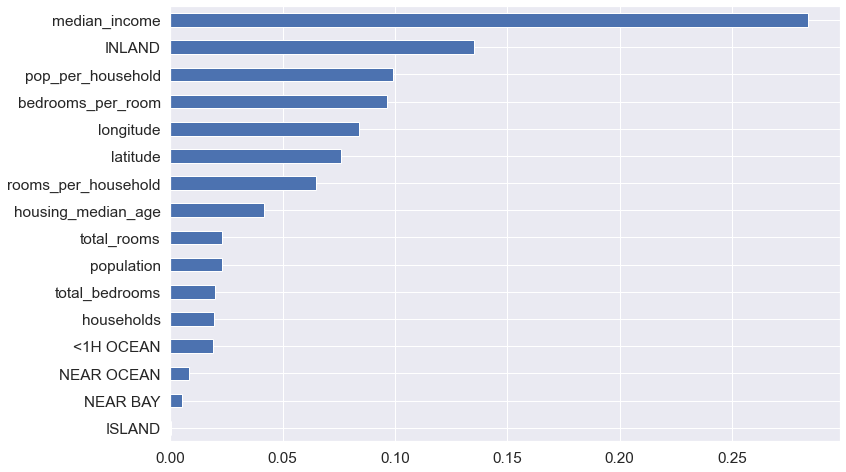

In [93]:
feature_imp.sort_values().plot(kind='barh', figsize=(12, 8))